In [2]:
import os
import yaml
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [16]:
with open('../config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.Loader)


directory = config['dir_name'] +'/df_fedavg_average'

fedavg = pd.DataFrame()
for i in [2,3,6,8]:
    fedavg[f'site{i}'] = pd.read_csv(directory+str(i)+'.csv',index_col = [0])
local_df = pd.read_csv(config['dir_name']+'/local_val_df.csv', index_col=[0])
centralized_df = pd.read_csv(config['dir_name']+'/centralized_score.csv', index_col=[0])
transfer = pd.read_csv(config['dir_name']+'/transfer_learning_score.csv', index_col=[0])

In [6]:
def concat(df,method):
    temp = pd.concat([df['site2'],df['site3'],df['site6'],df['site8']])
    temp = pd.DataFrame(temp,columns=['mean'])
    temp['site'] = ['site 2']*61+['site 3']*61+['site 6']*61+['site 8']*61
    temp['method'] = method
    return temp

In [12]:
# fill 10 的結果
local = concat(local_df,'Localized Learning')
central = concat(centralized_df,'Centralized Learning')
df_fedavg = concat(fedavg, 'Fedavg (average)')
df_transfer = concat(transfer, 'Transfer (average)')
boxplot_all = pd.concat([df_fedavg,local,df_transfer,central])
pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])

,site2,site3,site6,site8
Federated Learning (average),0.598702,0.764186,0.743043,0.714465
Localized Learning,0.479167,0.746446,0.704372,0.672621
Transfer Learning (average),0.516393,0.759968,0.724254,0.695354
Centralized Learning,0.616120,0.761108,0.739323,0.713621


In [15]:
# fill_median
local = concat(local_df,'Localized Learning')
central = concat(centralized_df,'Centralized Learning')
df_fedavg = concat(fedavg, 'Fedavg (average)')
df_transfer = concat(transfer, 'Transfer (average)')
boxplot_all = pd.concat([df_fedavg,local,df_transfer,central])
pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])

,site2,site3,site6,site8
Federated Learning (average),0.603939,0.764149,0.745481,0.713102
Localized Learning,0.480533,0.748467,0.699706,0.672629
Transfer Learning (average),0.542122,0.758895,0.731862,0.701085
Centralized Learning,0.611225,0.758923,0.740584,0.712355


In [20]:
# iterative imputation
local = concat(local_df,'Localized Learning')
central = concat(centralized_df,'Centralized Learning')
df_fedavg = concat(fedavg, 'Fedavg (average)')
df_transfer = concat(transfer, 'Transfer (average)')
boxplot_all = pd.concat([df_fedavg,local,df_transfer,central])
pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])

,site2,site3,site6,site8
Federated Learning (average),0.607468,0.764182,0.745103,0.716008
Localized Learning,0.479850,0.749660,0.700546,0.676293
Transfer Learning (average),0.542805,0.760357,0.732892,0.703417
Centralized Learning,0.617942,0.760775,0.740542,0.715892


In [ ]:
'''
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 
'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 
'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 
'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
'''

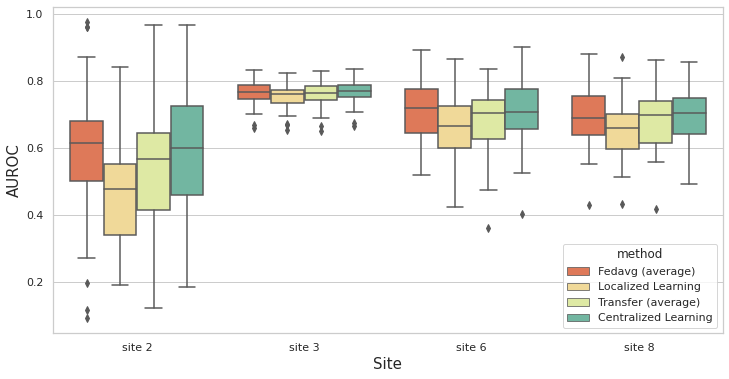

In [18]:
filename = 'fill_10'
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot_all, palette="Spectral",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)
plt.savefig('/home/refu0917/lungcancer/remote_output1/img_folder/'+filename)

Text(0.5, 0, 'Site')

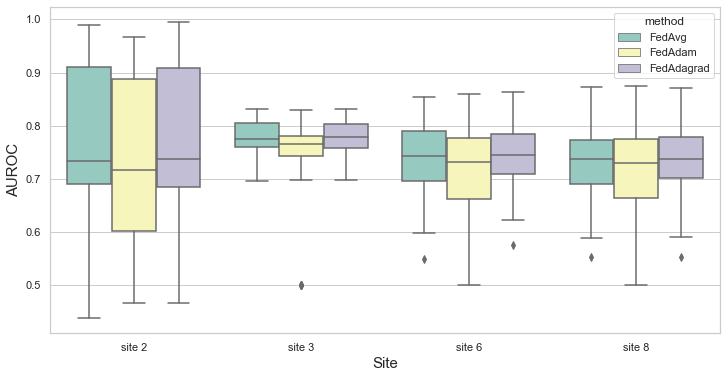

In [42]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot2, palette="Set3",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)

In [3]:
import scipy.stats as stats
from scipy.stats import shapiro
site2 = df[df['site'] == 'site 2']
site3 = df[df['site'] == 'site 3']
site6 = df[df['site'] == 'site 6']
site8 = df[df['site'] == 'site 8']

def split_method(df):
    fl = df[df['method'] == 'Federated Learning']
    cl = df[df['method'] == 'Centralized Learning']
    tl = df[df['method'] == 'Transfer Learning']
    ll = df[df['method'] == 'Localized Learning']
    return fl, cl, tl, ll

def check_distribution(df):
    print(np.unique(df.site))
    '''fl = df[df['method'] == 'Federated Learning']
    cl = df[df['method'] == 'Centralized Learning']
    tl = df[df['method'] == 'Transfer Learning']
    ll = df[df['method'] == 'Localized Learning']'''
    fl, cl,tl,ll = split_method(df)
    for i,j in zip([fl, cl,tl,ll],['Federated Learning','Centralized Learning','Transfer Learning','Localized Learning']):
        stat,p = shapiro(i['mean'])
        if p > 0.05:
            print(f'{j} pvalue={p} --> normal distribution')
        else:
            print(f'{j} pvalue={p} --> non-normal distribution')
    return

In [4]:
check_distribution(site2) #-->kruskal wallis
check_distribution(site3) #-->anova
check_distribution(site6) #-->kruskal wallis
check_distribution(site8) #-->anova

['site 2']
Federated Learning pvalue=0.0017631060909479856 --> non-normal distribution
Centralized Learning pvalue=0.3214898109436035 --> normal distribution
Transfer Learning pvalue=0.08616319298744202 --> normal distribution
Localized Learning pvalue=0.012976951897144318 --> non-normal distribution
['site 3']
Federated Learning pvalue=0.11725518107414246 --> normal distribution
Centralized Learning pvalue=0.23619839549064636 --> normal distribution
Transfer Learning pvalue=0.11769670248031616 --> normal distribution
Localized Learning pvalue=0.11769670248031616 --> normal distribution
['site 6']
Federated Learning pvalue=0.10238077491521835 --> normal distribution
Centralized Learning pvalue=0.48916685581207275 --> normal distribution
Transfer Learning pvalue=0.039354193955659866 --> non-normal distribution
Localized Learning pvalue=0.49258142709732056 --> normal distribution
['site 8']
Federated Learning pvalue=0.9033615589141846 --> normal distribution
Centralized Learning pvalue=0

# Site 2, 6 Kruskal Wallis

In [100]:
import scikit_posthocs as sp
def kruskal_wallis(df):
    print(np.unique(df.site))
    fl,cl,tl,ll = split_method(df)
    result = stats.kruskal(fl['mean'], cl['mean'], tl['mean'], ll['mean'])
    if result[1] < 0.05:
        print(f'{result[1]} , rejected h0')
    else:
        print(f'{result[1]} , do not rejected h0')
    # post hoc
    data = [fl['mean'], cl['mean'], tl['mean'], ll['mean']]
    
    p_values= sp.posthoc_dunn(df, val_col='mean', group_col='method')
    #p_values = sp.posthoc_conover(df, val_col='mean', group_col='method')
    p_values = pd.DataFrame(p_values)
    p_values = p_values.rename(columns={1:"Federated",2:"Centralized",3:"Transfered",4:"Localized"},index={1:"Federated",2:"Centralized",3:"Transfered",4:"Localized"})
    #print(p_values < 0.05)
    return pd.DataFrame(p_values)

site2_p_value = kruskal_wallis(site2)
site6_p_value = kruskal_wallis(site6)

['site 2']
9.124440742718965e-10 , rejected h0
['site 6']
0.0037720528160807795 , rejected h0


In [103]:
site2_p_value

,Centralized Learning,Federated Learning,Localized Learning,Transfer Learning
Centralized Learning,1.000000e+00,9.576395e-09,1.131978e-08,0.000002
Federated Learning,9.576395e-09,1.000000e+00,9.773437e-01,0.329305
Localized Learning,1.131978e-08,9.773437e-01,1.000000e+00,0.343580
Transfer Learning,1.911600e-06,3.293055e-01,3.435804e-01,1.000000


In [104]:
site6_p_value

,Centralized Learning,Federated Learning,Localized Learning,Transfer Learning
Centralized Learning,1.000000,0.013977,0.847988,0.309321
Federated Learning,0.013977,1.000000,0.008060,0.000512
Localized Learning,0.847988,0.008060,1.000000,0.409394
Transfer Learning,0.309321,0.000512,0.409394,1.000000


# Site 3, 8 ANOVA

In [53]:
import statsmodels.stats.multicomp as mc
def oneway_anova(df):
    print(f'{np.unique(df.site)} anova analysis result : ')
    fl, cl, tl, ll = split_method(df)
    # one - way anova
    result = scipy.stats.f_oneway(fl['mean'], cl['mean'], tl['mean'], ll['mean'])  
    if result[1] < 0.05:
        print(f'{result[1]} , rejected h0')
    else:
        print(f'{result[1]} , do not rejected h0')
    # post hoc
    comp = mc.MultiComparison(df['mean'],df['method'])
    # bonferroni
    tbl_bonf, _, _ = comp.allpairtest(stats.ttest_ind, method= "bonf")
    print(tbl_bonf)
    # sidak
    tbl_sidak, _, _ = comp.allpairtest(stats.ttest_ind, method= "sidak")
    print(tbl_sidak)
    
    # tukey 
    post_hoc_res = comp.tukeyhsd()
    print(post_hoc_res.summary())
    # scheffe
    return

In [58]:
oneway_anova(site3)

['site 3'] anova analysis result : 
0.3674407613282215 , do not rejected h0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
       group1              group2        stat   pval  pval_corr reject
----------------------------------------------------------------------
Centralized Learning Federated Learning 1.1032 0.2723       1.0  False
Centralized Learning Localized Learning  1.522 0.1308    0.7849  False
Centralized Learning  Transfer Learning  1.522 0.1308    0.7849  False
  Federated Learning Localized Learning 0.4504 0.6533       1.0  False
  Federated Learning  Transfer Learning 0.4504 0.6533       1.0  False
  Localized Learning  Transfer Learning    0.0    1.0       1.0  False
----------------------------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=sidak
alphacSidak=0.01, alphacBonf=0.008
       group1              group2        stat   pval  pval_corr reject
---------------------------

c:\Users\refuhung\anaconda3\envs\tf2.8.0\lib\site-packages\statsmodels\stats\multitest.py:155: RuntimeWarning: divide by zero encountered in log1p
  pvals_corrected = -np.expm1(ntests * np.log1p(-pvals))


             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
Centralized Learning Federated Learning   -0.007 0.6916 -0.0235 0.0095  False
Centralized Learning Localized Learning  -0.0098 0.4144 -0.0263 0.0067  False
Centralized Learning  Transfer Learning  -0.0098 0.4144 -0.0263 0.0067  False
  Federated Learning Localized Learning  -0.0028 0.9706 -0.0193 0.0136  False
  Federated Learning  Transfer Learning  -0.0028 0.9706 -0.0193 0.0136  False
  Localized Learning  Transfer Learning      0.0    1.0 -0.0165 0.0165  False
-----------------------------------------------------------------------------


In [56]:
oneway_anova(site8)

['site 8'] anova analysis result : 
0.19642807140919463 , do not rejected h0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
       group1              group2         stat   pval  pval_corr reject
-----------------------------------------------------------------------
Centralized Learning Federated Learning -1.3742 0.1721       1.0  False
Centralized Learning Localized Learning  0.6976 0.4869       1.0  False
Centralized Learning  Transfer Learning  0.2237 0.8234       1.0  False
  Federated Learning Localized Learning  2.0713 0.0406    0.2438  False
  Federated Learning  Transfer Learning  1.5962 0.1133    0.6796  False
  Localized Learning  Transfer Learning -0.4731 0.6371       1.0  False
-----------------------------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=sidak
alphacSidak=0.01, alphacBonf=0.008
       group1              group2         stat   pval  pval_corr reject
----------------

<AxesSubplot:>

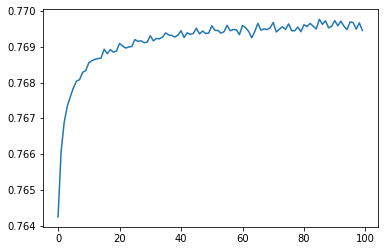

In [14]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/home/refu0917/lungcancer/remote_output1/output_folder/fl_auc_df9.csv')
df = df.T
sns.lineplot(data=df.mean())

In [3]:
local_result = pd.read_csv('local_result.csv',index_col=[0])

<AxesSubplot:ylabel='val_auc_rec'>

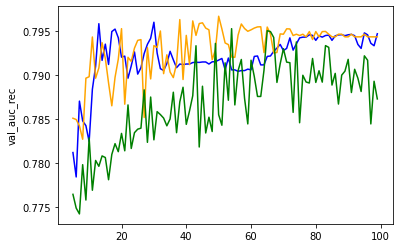

In [7]:
sns.lineplot(data=local_result['val_auc_rec'][5:],color='blue')
sns.lineplot(data=local_result['val_auc_exp'][5:],color='orange')
sns.lineplot(data=local_result['val_auc'][5:],color='green')

<AxesSubplot:ylabel='val_loss_rec'>

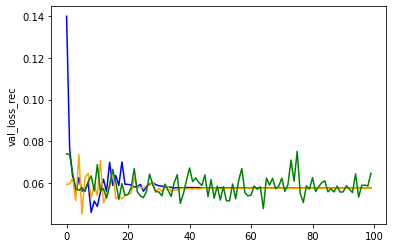

In [5]:
sns.lineplot(data=local_result['val_loss_rec'],color='blue')
sns.lineplot(data=local_result['val_loss_exp'],color='orange')
sns.lineplot(data=local_result['val_loss'],color='green')

In [83]:
columns = ["Class","LOC", "FullDate","Gender", "Age", "CIG",
            "ALC", "BN", "MAGN", "AJCCstage", "DIFF", "LYMND",
            "TMRSZ", "OP", "RTDATE", "STDATE", "BMI_label",
            "SSF1", "SSF2", "SSF3", "SSF4", "SSF6"]
df = pd.read_csv(r'/home/refu0917/lungcancer/server/AllCaseCtrl_final.csv')
df1 = df[columns]
df2 = df[columns]

In [79]:
df1['FullDate'] = df1['FullDate'].astype('string')
df1['year'] = [int(x[:4]) for x in list(df1['FullDate'])]
df1['null_count'] = list(df1.isna().sum(axis=1))
year_index = df1[df1['year'] < 2010].index.tolist()
null_index = df1[df1['null_count'] >= 9].index.tolist()
#　df1 = df1.loc[~df1.index.isin(year_index)]

df1 = df1.iloc[~df1.index.isin(year_index + null_index)]
df1.isna().sum()
# df1 = df1.iloc[~df1.index.isin(null_index)]


/tmp/ipykernel_1402313/3868939786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FullDate'] = df1['FullDate'].astype('string')
/tmp/ipykernel_1402313/3868939786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = [int(x[:4]) for x in list(df1['FullDate'])]
/tmp/ipykernel_1402313/3868939786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Class            0
LOC              0
FullDate         0
Gender           0
Age              0
CIG              0
ALC              0
BN               0
MAGN             7
AJCCstage        0
DIFF            45
LYMND            0
TMRSZ            5
OP               0
RTDATE           0
STDATE           0
BMI_label        1
SSF1          1306
SSF2             2
SSF3          1739
SSF4             2
SSF6          1314
year             0
null_count       0
dtype: int64